仕掛けたときのツモ数と勝敗の関係を出力

In [6]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import os
import collections

In [7]:
folder = "puyopuyo_saikyo_league/stats/s1_day1_momoken_rein_2"
games = 57

In [8]:
#仕掛けのツモ数と勝ち負けの出力

#1Pと2Pそれぞれについて勝ち=1, 負け=0のリスト作成(win_nP_list)
win_1P_list = []
win_2P_list = []

for i in range(games):
    #ファイル読みこみ
    filepath = folder + "/" + str(i) + "_6.csv"
    df_game = pd.read_csv(filepath)
    
    #勝ちなら1、負けなら0を格納
    if df_game["Win"].iloc[0] == 1:
        win_1P_list.append(1)
        win_2P_list.append(0)
    else:
        win_1P_list.append(0)
        win_2P_list.append(1)      

#各試合について仕掛けのツモ数のリストを作成(shikake_t_list)
#各試合についてどちらが仕掛けたかのリスト(shikake_list)を作成
shikake_t_list = []
shikake_list = []

for i in range(games):
    #ファイル読み込み
    filepath = folder + "/" + str(i) + "_6.csv"
    df_game = pd.read_csv(filepath)
    num = 0
    index = 0
    N = len(df_game["Player"])
     
    #仕掛けとカウントしたらnumを1にして次の試合へ    
    while (num<1):
        #全消し戦はノーカウント(-1)
        if df_game["Zenkeshi"].iloc[0] == 1:
            shikake_t_list.append(-1)
            shikake_list.append(-1)
            num = 1
        #連鎖がない試合の場合ノーカウント(-1)
        elif N == 0:
            shikake_t_list.append(-1)
            shikake_list.append(-1)
            num = 1
        #(★)の後に連鎖が発生せず試合が終わった(index=N)場合、★をカウント
        elif index == N:
            shikake_t_list.append(df_game["Tumo"].iloc[index-1])
            shikake_list.append(df_game["Player"].iloc[index-1])
        else:
            #12手以内の単発でおじゃま発生が4つ未満かつ対応が発生しなかった場合、ノーカウント→次の行を参照→(★)
            if (df_game["Rensa"].iloc[index]==1)&(df_game["Tumo"].iloc[index]<=12)&(df_game["Ojama_detail"].iloc[index]<4)&(df_game["Continue"].iloc[index]==0):
                index += 1
            #ほとんどがこの場合。ツモ数とプレイヤーを格納
            else:
                if df_game["Player"].iloc[index] == 1:
                    shikake_t_list.append(df_game["Tumo"].iloc[index])
                    shikake_list.append(df_game["Player"].iloc[index])
                else:
                    shikake_t_list.append(df_game["Tumo"].iloc[index])
                    shikake_list.append(df_game["Player"].iloc[index])
                num = 1


#(1P/2P)/(勝/負)の4パターンでツモ数を分類
tumo_win_1P = []
tumo_win_2P = []
tumo_lose_1P = []
tumo_lose_2P = []

for i in range(len(win_1P_list)):
    if shikake_list[i] == 1:
        if win_1P_list[i] == 1:
            tumo_win_1P.append(shikake_t_list[i])
        else:
            tumo_lose_1P.append(shikake_t_list[i])
    elif shikake_list[i] == 2:
        if win_2P_list[i] == 1:
            tumo_win_2P.append(shikake_t_list[i])
        else:
            tumo_lose_2P.append(shikake_t_list[i])
    else:
        pass
    
#1~6手、7~12手、13~18手、19~24手、25~30手、31~36手ごとの数を出力
w_1P = []
l_1P = []
w_2P = []
l_2P = []

for i in range(6):
    w_1P.append(sum(((i*6)<x<(i*6+7)) for x in tumo_win_1P))
    l_1P.append(sum(((i*6)<x<(i*6+7)) for x in tumo_lose_1P))
    w_2P.append(sum(((i*6)<x<(i*6+7)) for x in tumo_win_2P))
    l_2P.append(sum(((i*6)<x<(i*6+7)) for x in tumo_lose_2P))
    
df_shikake_tumo = pd.DataFrame(list(zip(w_1P, l_1P, w_2P, l_2P)), columns=["1P勝利", "1P敗北", "2P勝利", "2P敗北"],
                              index=["1～6手", "7～12手", "13～18手", "19～24手", "25～30手", "31～36手"])   
df_shikake_tumo

,1P勝利,1P敗北,2P勝利,2P敗北
1～6手,0,0,0,0
7～12手,0,0,0,0
13～18手,0,2,0,0
19～24手,2,1,3,5
25～30手,5,8,6,9
31～36手,3,0,2,1


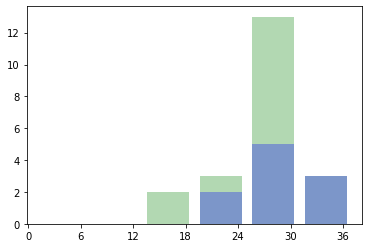

In [9]:
#pythonコード上でもグラフ出力, 1P側
#ヒストグラムの作り方に誤りがあったのでS2からこちらを使います
plt.figure()
plt.hist(tumo_win_1P+tumo_lose_1P, list(range(1, 38, 6)), alpha=0.3, color="g", range=(0.5,36.5), align="mid", rwidth=0.8)
plt.hist(tumo_win_1P,list(range(1, 38, 6)), alpha=0.3, color='b', range=(0.5,36.5), align="mid", rwidth=0.8)
plt.xticks(list(range(0, 37, 6)))
plt.show()

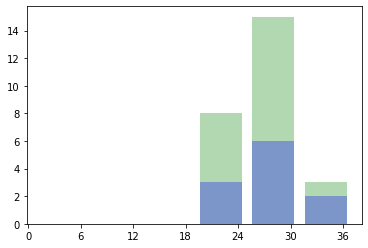

In [10]:
#pythonコード上でも出力, 2P側
plt.figure()
plt.hist(tumo_win_2P+tumo_lose_2P, list(range(1, 38, 6)), alpha=0.3, color="g", range=(0.5,36.5), align="mid", rwidth=0.8)
plt.hist(tumo_win_2P,list(range(1, 38, 6)), alpha=0.3, color='b', range=(0.5,36.5), align="mid", rwidth=0.8)
plt.xticks(list(range(0, 37, 6)))
plt.show()